# PCA NA + EUR
# EUCLID DIST BETWEEN

In [1]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [2]:
crta_coords = pd.read_csv('calculate_aoo/df2csv/cornuta_all.csv')
crta_coords = crta_coords[(crta_coords['lat']>0) & (crta_coords['long']>-20)]
print(f'lat_min = {crta_coords['lat'].min()}\nlat_max = {crta_coords['lat'].max()}\nlon_min = {crta_coords['long'].min()}\nlat_max = {crta_coords['long'].max()}\n')

lat_min = 34.9625
lat_max = 59.918117
lon_min = -7.537369
lat_max = 51.08368



In [3]:
bbox = [-8, 35, 52, 60] #minx, miny, maxx, maxy

num_points_side = int(np.sqrt(5000))  
lons = np.linspace(bbox[0], bbox[2], num_points_side)
lats = np.linspace(bbox[1], bbox[3], num_points_side)

grid_points = [Point(lon, lat) for lat in lats for lon in lons]
grid_gdf = gpd.GeoDataFrame(geometry=grid_points)

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

land_points = grid_gdf[grid_gdf['geometry'].apply(lambda point:gdf.contains(point).any() and not lakes_gdf.contains(point).any())]
land_coordinates = [(point.y, point.x) for point in land_points['geometry']]

lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

(-10.99999999999996, 52.9999999999998, 33.99999999999987, 69.03428709808546)

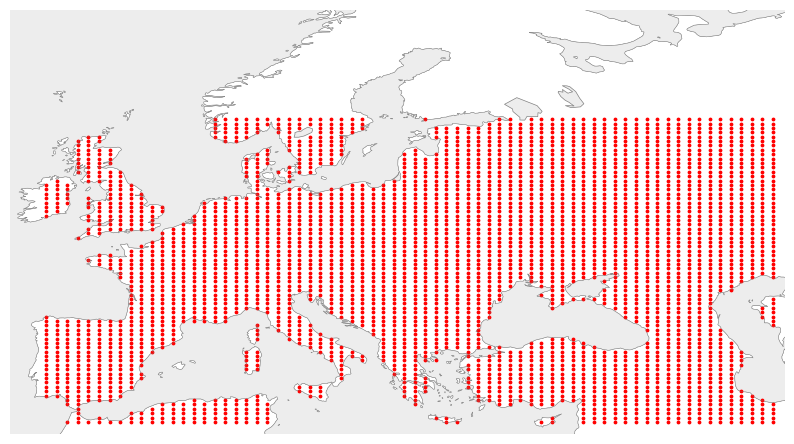

In [4]:

plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()
ax.set_extent([-11, 53, 34,  66])  # Set the extent (longitude, longitude, latitude, latitude)


ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

#ndvi_tiff_path = '/home/mpgetz/repos/bee_mapping/data/wc2.1_30s_bio/NDVI_hires.tif'
#with rasterio.open(ndvi_tiff_path) as ndvi_src:
#   ndvi_data = ndvi_src.read(1)
#    vmin, vmax = ndvi_data.min(), ndvi_data.max()

#    plt.imshow(ndvi_data, vmin=-1, vmax=1, origin='upper', transform=ccrs.PlateCarree(), cmap='twilight_shifted')

lats, lons = zip(*land_coordinates)
ax.scatter(lons, lats, transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
ax.axis('off')

# cbar = plt.colorbar(label='NDVI', fraction=0.03, pad=0.04)
# cbar.set_label('NDVI') , extent=[-127, -64.5, 34, 55]

In [5]:
europe_df = pd.DataFrame(land_coordinates, columns=['lat', 'lon'])

In [6]:
# import os
# from concurrent.futures import ThreadPoolExecutor


# def get_value_from_array(lat, long, src, array):
#     try:
#         row, col = src.index(long, lat)
#         return array[row, col]
#     except Exception as e:
#         print(f'Error at {lat}, {long}: {e}')
#         return None
    
# ndvi_tiff_path = 'data/tifs/NDVI_Image.tif'
# all_files = [ndvi_tiff_path]

# print(all_files)

# def process_file(file):
#     column_name = 'ndvi'
#     print(f'Processing: {column_name}\n')

#     with rasterio.open(file) as src:
#         array = src.read(1)  
#         europe_df[column_name] = europe_df.apply(lambda row: get_value_from_array(row['lat'], row['lon'], src, array), axis=1)

# with ThreadPoolExecutor(max_workers=1) as executor: 
#     executor.map(process_file, all_files)

# directory = 'data/wc2.1_30s_bio'
# all_files = [f for f in os.listdir(directory) if f.endswith('.tif') and "wc2.1_30s_" in f]

# print(all_files)

# def process_file(file):
#     column_name = file.split("wc2.1_30s_")[1].replace(".tif", "")
#     file_path = os.path.join(directory, file)
#     print(f'Processing: {column_name}\n')

#     with rasterio.open(file_path) as src:
#         array = src.read(1)  
#         europe_df[column_name] = europe_df.apply(lambda row: get_value_from_array(row['lat'], row['lon'], src, array), axis=1)

# with ThreadPoolExecutor(max_workers=4) as executor:  
#     executor.map(process_file, all_files)

# europe_df.to_csv('data/csv/europe_bioclim_ndvi.csv')


In [7]:
europe_df = pd.read_csv('data/csv/europe_bioclim_ndvi.csv')
europe_df.drop(columns=['Unnamed: 0'])

,lat,lon,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,...,bio_2,bio_16,bio_15,bio_1,bio_8,bio_19,bio_14,bio_7,bio_18,bio_4
0,35.0,-6.260870,-0.125140,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-32768,-3.400000e+38,-3.400000e+38,...,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38
1,35.0,-5.391304,0.283199,1.490000e+02,1.096667e+01,2.548333e+01,3.360000e+01,328,5.200000e+00,3.984742e+01,...,1.131667e+01,4.140000e+02,8.102385e+01,1.797500e+01,1.096667e+01,4.140000e+02,0.000000e+00,2.840000e+01,1.100000e+01,5.869393e+02
2,35.0,-4.521739,0.163205,1.260000e+02,5.750000e+00,2.031667e+01,2.950000e+01,1343,4.000000e-01,4.083620e+01,...,1.188333e+01,3.630000e+02,7.010957e+01,1.264167e+01,6.750000e+00,3.500000e+02,2.000000e+00,2.910000e+01,2.400000e+01,5.944051e+02
3,35.0,-3.652174,0.131960,8.000000e+01,5.966667e+00,2.040000e+01,2.900000e+01,1270,1.000000e+00,3.946429e+01,...,1.105000e+01,2.100000e+02,5.642151e+01,1.277500e+01,5.966667e+00,2.100000e+02,5.000000e+00,2.800000e+01,3.700000e+01,5.924545e+02
4,35.0,-2.782609,0.130316,5.800000e+01,1.168333e+01,2.335000e+01,3.080000e+01,323,6.300000e+00,4.323129e+01,...,1.059167e+01,1.290000e+02,7.305995e+01,1.734583e+01,1.221667e+01,1.250000e+02,0.000000e+00,2.450000e+01,1.400000e+01,4.868333e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,60.0,48.521739,0.303576,8.100000e+01,-1.166667e+01,-4.116667e+00,2.200000e+01,183,-1.690000e+01,2.137961e+01,...,8.316667e+00,2.250000e+02,3.443332e+01,1.808333e+00,1.505000e+01,1.110000e+02,2.600000e+01,3.890000e+01,2.250000e+02,1.075533e+03
3412,60.0,49.391304,0.321320,7.900000e+01,-1.166667e+01,-4.116667e+00,2.240000e+01,184,-1.630000e+01,2.088717e+01,...,8.083333e+00,2.150000e+02,3.583277e+01,1.958333e+00,1.535000e+01,1.030000e+02,2.500000e+01,3.870000e+01,2.150000e+02,1.087950e+03
3413,60.0,50.260870,0.268473,8.000000e+01,-1.241667e+01,-4.866667e+00,2.260000e+01,184,-1.740000e+01,2.160417e+01,...,8.641666e+00,2.170000e+02,3.527664e+01,1.545834e+00,1.528333e+01,1.010000e+02,2.600000e+01,4.000000e+01,2.170000e+02,1.114048e+03
3414,60.0,51.130435,0.265417,8.100000e+01,-1.278333e+01,-5.116667e+00,2.280000e+01,164,-1.890000e+01,2.250200e+01,...,9.383333e+00,2.180000e+02,3.641564e+01,1.300000e+00,1.523333e+01,1.050000e+02,2.500000e+01,4.170000e+01,2.180000e+02,1.129461e+03


In [8]:
europe = europe_df.copy()
europe_points = europe[['lat', 'lon']]
europe = europe.drop(columns=['lat', 'lon', 'Unnamed: 0'])
europe['group'] = 'europe'

In [9]:
europe = europe[europe['elev'] > 0]


In [10]:
europe.describe()

,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,bio_17,bio_12,...,bio_2,bio_16,bio_15,bio_1,bio_8,bio_19,bio_14,bio_7,bio_18,bio_4
count,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,...,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000
mean,0.254352,85.156567,-1.402486,5.991782,25.468656,417.281759,-5.831898,30.270877,103.534912,661.994156,...,9.267782,232.981544,33.707585,8.620667,13.093130,160.608121,30.553983,31.300554,174.256844,821.593774
std,0.082816,33.149773,5.733253,10.904702,4.722478,530.565971,5.895086,5.859146,58.312386,270.438398,...,1.769590,93.922090,15.933750,4.043764,5.727481,95.132773,18.328635,6.161037,88.003959,206.470981
min,-0.231159,16.000000,-17.916666,-17.916666,2.800000,1.000000,-22.400000,18.612520,0.000000,124.000000,...,3.666667,42.000000,8.452323,-9.775000,-7.466667,24.000000,0.000000,14.400001,0.000000,329.865400
25%,0.211163,67.000000,-5.816667,-2.383333,22.350000,110.000000,-10.000000,25.143116,76.000000,524.500000,...,8.108334,182.000000,23.196458,5.708334,8.516666,106.000000,22.000000,27.000000,119.000000,669.991070
50%,0.268172,80.000000,-1.466667,1.533333,24.400000,190.000000,-5.700000,30.080782,96.000000,611.000000,...,8.833333,219.000000,30.909689,8.212500,15.333334,124.000000,29.000000,31.100000,192.000000,799.005430
75%,0.308787,93.000000,2.791667,17.066668,28.250000,505.000000,-1.100000,34.737777,123.000000,726.000000,...,10.225000,253.000000,37.907331,10.862500,17.383333,188.000000,37.000000,35.900000,225.000000,972.531200
max,0.468739,349.000000,14.216667,35.200000,44.400000,4506.000000,8.400000,48.260075,464.000000,2687.000000,...,16.199999,965.000000,100.287120,24.820833,23.483334,850.000000,142.000000,49.000000,607.000000,1374.563500


In [11]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
#america = america.drop(columns='Unnamed: 0')
america = america[america['bio_13']!= -3.4e+38]
america = america[america['elev']> 0]
column_order = europe_df.columns.tolist()
america = america[column_order]
america_points = america[['lat', 'lon']].reset_index(drop=True)
america = america.drop(columns=['lat', 'lon'])
america['group'] = 'america'


In [12]:
america = america.drop(columns='Unnamed: 0')

In [13]:
america.describe()

,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,bio_17,bio_12,...,bio_2,bio_16,bio_15,bio_1,bio_8,bio_19,bio_14,bio_7,bio_18,bio_4
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,...,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,0.235197,101.041469,-3.609023,1.989141,28.133145,735.869778,-11.084560,34.686399,110.543076,745.135425,...,13.170054,275.061668,42.666961,8.379412,14.905318,155.037337,31.820352,39.217705,224.174139,950.504845
std,0.099214,51.872439,9.630384,12.744884,5.347003,668.523579,9.759577,9.044435,83.993989,412.019893,...,2.420581,146.538098,22.180030,6.865420,7.989649,149.920757,25.567825,6.647571,104.611049,251.542649
min,-0.194264,10.000000,-22.516666,-21.066668,7.500000,1.000000,-30.100000,18.310658,0.000000,60.000000,...,5.558333,24.000000,5.816862,-5.608333,-12.466667,17.000000,0.000000,14.300001,2.000000,199.059810
25%,0.166246,72.000000,-10.800000,-8.766666,23.700000,254.000000,-18.500000,26.796895,42.000000,416.000000,...,11.466667,189.000000,23.083239,2.720833,11.283334,54.000000,11.000000,34.600000,150.000000,772.351480
50%,0.242886,98.000000,-3.800000,-1.433333,28.500000,464.000000,-10.700000,34.080300,80.000000,695.000000,...,12.658334,269.000000,40.438663,7.679167,15.916667,108.000000,22.000000,39.200000,238.000000,923.962160
75%,0.304186,118.000000,3.591667,14.483334,32.400000,1120.000000,-3.600000,40.714015,171.000000,1009.000000,...,14.916667,329.000000,58.471063,13.572916,20.183332,209.000000,50.000000,44.800000,297.000000,1164.580450
max,0.534848,577.000000,20.933334,29.100000,45.000000,3926.000000,17.400000,70.047165,521.000000,4233.000000,...,21.108334,1645.000000,123.681450,24.941666,33.250000,1384.000000,153.000000,51.600000,699.000000,1451.338600


In [14]:
america_points 

,lat,lon
0,25.0,-111.727273
1,25.0,-111.050505
2,25.0,-107.666667
3,25.0,-106.989899
4,25.0,-106.313131
...,...,...
6530,54.0,-65.707071
6531,54.0,-65.030303
6532,54.0,-64.353535
6533,54.0,-63.676768


In [15]:
osmia = pd.read_csv('data/csv/bioclim.csv')
osmia = osmia[column_order]
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia = osmia[osmia['elev']> 0]
coords = osmia[['lat', 'lon']]
# osmia = osmia.drop(columns=['lat', 'lon'])
# osmia['group'] = 'osmia'


crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
osmia = pd.merge(osmia, crta_coords_filtered, on=['lat', 'lon'])
osmia = osmia.drop_duplicates(subset=['lat', 'lon'])
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia_coords = osmia[['lat', 'lon']]
osmia = osmia.drop(columns=['lat', 'lon'])
osmia['group'] = 'osmia'

In [16]:
osmia = osmia.drop(columns=['Unnamed: 0'])

In [17]:
osmia.describe()

,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,bio_17,bio_12,...,bio_2,bio_16,bio_15,bio_1,bio_8,bio_19,bio_14,bio_7,bio_18,bio_4
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,...,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,0.256794,84.391770,2.525564,6.091684,23.891918,193.477695,-0.948856,33.389905,154.334486,774.406914,...,8.278501,235.904033,18.623511,10.009688,12.832826,179.278848,46.286584,24.840774,212.502058,624.651607
std,0.067896,19.633771,1.817177,4.892664,1.938135,219.921097,1.876418,2.355533,37.393388,157.878150,...,0.899696,54.258283,8.645285,1.356123,5.250783,46.886702,12.097195,2.535589,57.132840,75.678414
min,-0.055812,41.000000,-6.516667,-6.300000,9.900000,1.000000,-11.000000,22.902868,6.000000,328.000000,...,5.083334,116.000000,7.727378,-0.629167,-1.366667,64.000000,1.000000,15.400001,6.000000,363.726500
25%,0.218283,73.000000,1.400000,3.716667,22.800000,46.000000,-2.000000,32.142857,133.000000,668.000000,...,7.691667,204.000000,13.031209,9.325000,7.350000,151.000000,40.000000,22.900000,188.000000,566.954170
50%,0.263979,79.000000,2.566667,5.550000,23.400000,129.000000,-0.800000,33.234127,156.000000,772.000000,...,8.141666,223.000000,15.465448,9.900000,15.583333,183.000000,46.000000,24.500000,204.000000,615.575600
75%,0.303745,91.000000,3.500000,6.283333,24.700000,260.000000,0.250000,34.599107,173.000000,836.000000,...,8.666667,251.000000,21.676554,10.416667,17.033333,199.000000,53.000000,26.199999,226.000000,665.625000
max,0.460837,234.000000,11.600000,25.233334,34.200000,2479.000000,8.000000,46.227200,428.000000,1921.000000,...,13.800000,570.000000,88.891600,18.087500,21.700000,557.000000,129.000000,40.200000,552.000000,1162.149500


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
combined = pd.concat([europe, america, osmia], ignore_index=True)
combined_points = pd.concat([europe_points, america_points, osmia_coords], ignore_index=True)
combined.describe()
combined_vars = combined.drop(columns=['group'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_vars)
combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
bio_columns = [col for col in combined_scaled.columns if col.startswith('bio_')]


other_columns = [col for col in combined_scaled.columns if not col.startswith('bio_')]
bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
other_columns_sorted = sorted(other_columns)
sorted_columns = bio_columns_sorted + other_columns_sorted
combined_scaled = combined_scaled[sorted_columns]

In [20]:
combined_scaled.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,...,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,15861.000000,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04
mean,-1.003478e-16,2.293663e-16,-8.171174e-16,-5.877511e-16,1.146831e-16,-7.167697e-17,8.601236e-17,2.150309e-16,-2.867079e-17,4.874034e-16,...,1.791924e-16,-2.150309e-17,8.601236e-17,-1.146831e-16,-6.450927e-17,0.000000,1.075155e-16,-8.242851e-17,-5.734157e-17,-2.221986e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,...,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-3.839491e+00,-2.342107e+00,-2.219102e+00,-2.488000e+00,-5.004732e+00,-2.904703e+00,-2.131725e+00,-3.926911e+00,-2.489870e+00,-5.135590e+00,...,-2.190444e+00,-2.070210e+00,-1.755297e+00,-1.291568e+00,-2.061400e+00,-1.846400,-2.388412e+00,-1.350890e+00,-8.173655e-01,-5.589282e+00
25%,-4.985776e-01,-8.047082e-01,-5.759826e-01,-7.899480e-01,-6.833333e-01,-5.663234e-01,-8.614402e-01,-6.977836e-01,-6.487875e-01,-5.529771e-01,...,-5.975239e-01,-4.935558e-01,-7.617749e-01,-7.962098e-01,-4.934069e-01,-0.760967,-4.728670e-01,-5.956643e-01,-6.368399e-01,-5.896433e-01
50%,1.012915e-01,-3.046246e-01,-3.940731e-02,-2.915203e-01,-3.376214e-01,3.787212e-01,-2.023302e-01,2.836914e-01,1.817695e-02,-2.494367e-01,...,-5.580226e-02,-2.138269e-01,4.250526e-02,-2.955573e-01,-2.124370e-01,0.016437,-2.818703e-02,-9.521335e-02,-3.855198e-01,1.259378e-01
75%,3.570432e-01,6.126712e-01,4.383685e-01,6.428197e-01,6.346934e-01,7.179680e-01,7.563753e-01,5.958655e-01,4.927165e-01,4.883343e-01,...,4.117551e-01,3.710607e-01,6.102324e-01,5.003978e-01,3.676299e-01,0.603157,5.191114e-01,3.142465e-01,1.595969e-01,6.728691e-01
max,3.239983e+00,3.638890e+00,5.448031e+00,2.702917e+00,4.113420e+00,2.850376e+00,2.338239e+00,2.923435e+00,3.015440e+00,4.147679e+00,...,1.126554e+01,1.234854e+01,5.483224e+00,4.607748e+00,1.263061e+01,5.795631,5.581622e+00,1.108759e+01,7.155851e+00,3.357309e+00


In [21]:
no_osmia_ind = combined[combined['group'] != 'osmia'].index
combined_filtered = combined_scaled.loc[no_osmia_ind]
combined_clipped = combined.loc[no_osmia_ind]



yes_osmia_ind = combined[combined['group'] == 'osmia'].index
osmia_scaled = combined_scaled.loc[yes_osmia_ind]

In [22]:
america_index = combined[combined['group'] == 'america'].index
america_df = combined_scaled.loc[america_index]

In [23]:
osmia_scaled

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
9786,0.128481,-0.839000,-0.497809,-0.366094,-0.294407,0.463533,-0.621764,0.718238,-0.221539,-0.068156,...,-0.246050,-0.239257,-0.052116,-0.304401,-0.194310,-0.012899,0.234060,-0.304493,-0.466933,-1.048022
9787,0.194755,-0.793278,-0.441051,-0.372840,-0.229586,0.487765,-0.609780,0.760693,-0.185663,0.003513,...,-0.304091,-0.264687,-0.099427,-0.221094,-0.221501,-0.086239,0.199854,-0.368187,-0.612062,-1.121832
9788,0.069004,-0.970450,-0.257077,-0.681347,-0.640119,0.584692,-0.933343,0.540923,0.054053,-0.367480,...,-0.397603,-0.518986,-0.099427,-0.722112,-0.565915,0.045773,-0.233424,-0.268096,-0.679316,-0.804160
9789,0.206651,-0.776132,-0.430283,-0.363643,-0.186372,0.499881,-0.597796,0.773180,-0.184032,0.024592,...,-0.352459,-0.315547,-0.194048,-0.229622,-0.284945,-0.188915,0.120040,-0.404583,-0.631530,-0.397998
9790,0.143775,-0.764702,0.067683,-0.779230,-0.532084,0.621040,-0.909375,0.341131,0.119282,-0.342185,...,-0.139640,-0.442696,0.279058,-0.887850,-0.429962,0.309797,-0.108001,-0.077015,-0.617371,0.489262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,0.199004,-0.670400,-0.026312,-0.564058,-0.272800,0.608924,-0.753586,0.461007,-0.112281,-0.106099,...,-0.565279,-0.696995,-0.099427,-0.590486,-0.629360,-0.247587,-0.507073,-0.440979,-0.465164,-0.063310
15857,0.261030,-0.593245,0.026050,-0.536934,-0.164765,0.621040,-0.705651,0.518446,-0.089451,-0.017566,...,-0.449195,-0.620705,0.042505,-0.567108,-0.502470,-0.130243,-0.393053,-0.331790,-0.647459,0.145265
15858,0.333252,-0.710407,-0.130551,-0.518124,-0.143158,0.657388,-0.729618,0.563399,-0.056836,0.083614,...,-0.371807,-0.391836,-0.004805,-0.356682,-0.330263,-0.144911,-0.199218,-0.386385,-0.656308,-0.317952
15859,0.152272,-0.964735,-0.341384,-0.626481,-0.488870,0.608924,-0.873424,0.388582,-0.128588,-0.224142,...,-0.429848,-0.696995,0.184437,-0.745133,-0.611233,-0.012899,-0.507073,-0.204403,-0.541267,0.645209


Explained Variance Ratio: [0.33635471 0.31394969 0.114903   0.08285589 0.05100059]
Total explained variance: 0.8990638835891233


Text(0.5, 1.0, 'PCA Loadings Heatmap')

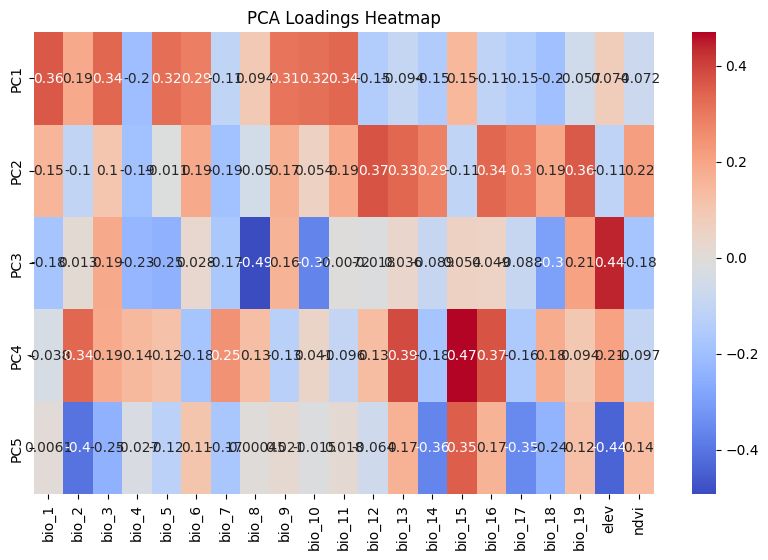

In [24]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=5) 
pca_result = pca.fit_transform(combined_filtered) 
loadings = pca.components_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())
loadings_df = pd.DataFrame(loadings, columns=combined_scaled.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')

In [25]:
n_components = pca_result.shape[1]

for i in range(n_components):
    combined_filtered[f'PC{i+1}'] = pca_result[:, i]


In [26]:
osmia_pca = pca.transform(osmia_scaled)
for i in range(n_components):
    osmia_scaled[f'PC{i+1}'] = osmia_pca[:, i]

In [27]:
combined_filtered['group'] = combined_clipped['group']
osmia_scaled['group'] = 'osmia'

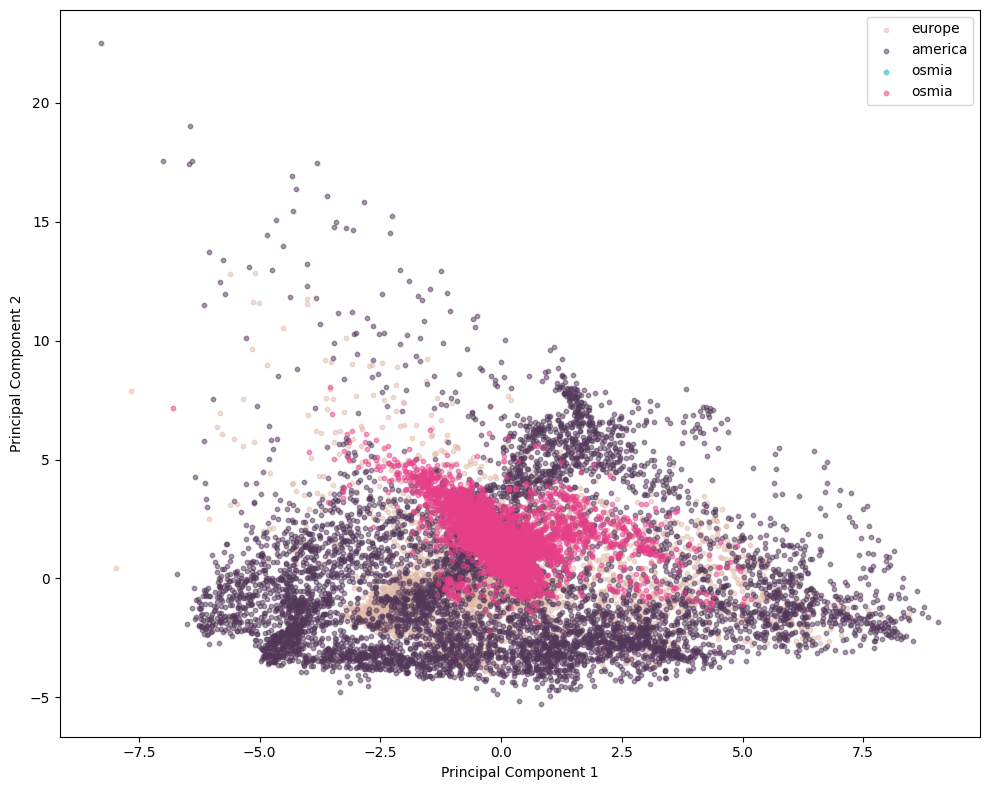

In [28]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

unique_labels = combined['group'].unique()  
for i, label in enumerate(unique_labels):
    subset = combined_filtered[combined_filtered['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.5)
plt.scatter(osmia_scaled['PC1'], osmia_scaled['PC2'], c=colors[i+1], label=label, s=10, marker= 'o', alpha=0.5)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

In [29]:
# osmia_scaled.reset_index(inplace=True)
# osmia_scaled[osmia_scaled['PC1']<-6]

In [30]:
# osmia_coords.iloc[3666]

In [31]:
# osmia_coords.iloc[3666]['lat']
# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()
# ax.set_extent([-11, 53, 34,  66]) 

# ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(osmia_coords.iloc[3666]['lon'], osmia_coords.iloc[3666]['lat'], transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
# ax.axis('off')

In [32]:
osmia_pca_df = osmia_scaled.iloc[:, -6:-1].reset_index(drop=True)
america_pca_df = combined_filtered[combined_filtered['group'] == 'america']
america_pca_df = america_pca_df.iloc[:, -6:-1].reset_index(drop=True)
europe_pca_df = combined_filtered[combined_filtered['group'] == 'europe']
europe_pca_df = europe_pca_df.iloc[:, -6:-1].reset_index(drop=True)


In [33]:
america_pca_df

,PC1,PC2,PC3,PC4,PC5
0,8.715500,-1.433743,-0.810227,0.444706,0.527541
1,8.606064,-0.530807,-1.016748,2.224948,0.895581
2,7.579311,3.047354,-2.083340,4.118737,2.007959
3,6.485787,5.375444,-2.184290,5.452801,1.678188
4,2.298891,6.703964,1.785765,6.514916,0.060741
...,...,...,...,...,...
6530,-6.156229,-1.924828,0.530958,0.707005,-0.207386
6531,-6.149656,-2.357626,1.103827,0.673745,-0.633764
6532,-6.194096,-1.478137,0.532050,0.727590,-0.602730
6533,-6.333093,-1.709678,1.346337,0.319575,-0.879033


In [34]:
# shortest_distances_only = []

# for _, america_point in america_pca_df.iterrows():
#     distances = [np.linalg.norm(america_point - osmia_point) for _, osmia_point in osmia_pca_df.iterrows()]
#     shortest_distance = min(distances)
#     shortest_distances_only.append(shortest_distance)

In [35]:
from concurrent.futures import ProcessPoolExecutor

def min_distance_to_osmia_points(america_point):
    distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_pca_df.to_numpy()]
    return min(distances)

america_pca_arr = america_pca_df.to_numpy()

with ProcessPoolExecutor() as executor:
    shortest_distances_only = list(executor.map(min_distance_to_osmia_points, america_pca_arr))


In [37]:
import heapq

osmia_pca_arr = osmia_pca_df.to_numpy()

def second_smallest_distance_to_osmia_points(america_point):
    distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_pca_df.to_numpy()]
    # Use heapq.nsmallest to get the two smallest distances and return the second one
    two_smallest_distances = heapq.nsmallest(2, distances)
    return two_smallest_distances[1] if len(two_smallest_distances) > 1 else None


with ProcessPoolExecutor() as executor:
    second_shortest_distances_only = list(executor.map(second_smallest_distance_to_osmia_points, osmia_pca_arr))


In [38]:
max(second_shortest_distances_only)

4.187382021969685

In [44]:
min(shortest_distances_only)

0.188467767578857

In [39]:
max(shortest_distances_only)

18.184998550053088

Text(0.5, 1.0, 'distribution of mahal distances, america to eur')

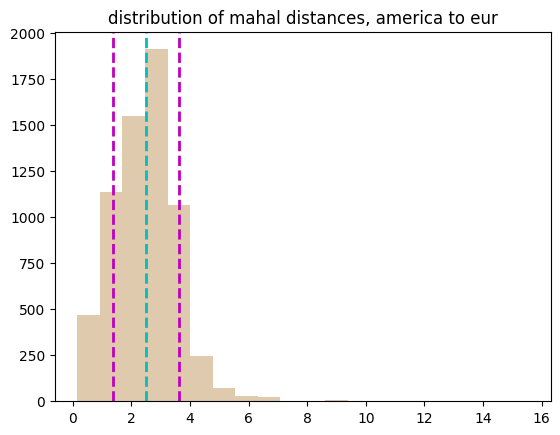

In [ ]:
mean = np.mean(shortest_distances_only)
std_dev = np.std(shortest_distances_only)

# Create histogram
plt.hist(shortest_distances_only, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, america to eur')

Text(0.5, 1.0, 'distribution of mahal distances, eur to eur')

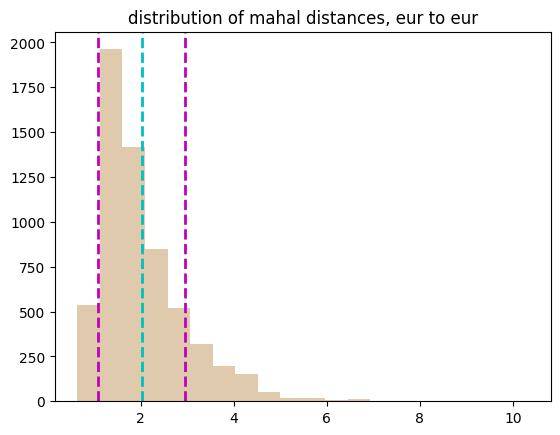

In [ ]:
mean = np.mean(mahal_distances_eur)
std_dev = np.std(mahal_distances_eur)
# z = 1.96
# upper_bound = mean + z * std_dev

plt.hist(mahal_distances_eur, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.axvline(upper_bound, color='k', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, eur to eur')

In [40]:
america_points['dist'] = shortest_distances_only

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

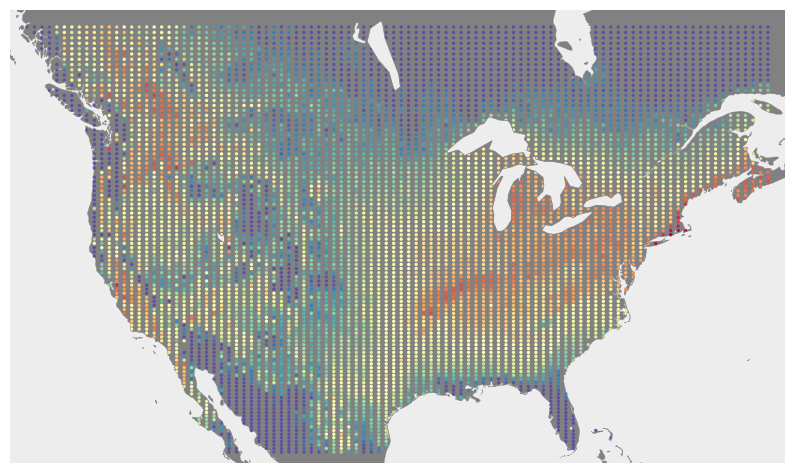

In [46]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

map_projection = ccrs.Mercator() 

great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='Spectral', vmin=0.2, vmax = 4.3, s=2)

ax.axis('off')
